# Import dependencies and clean data

In [1]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\kirst\appdata\local\continuum\anaconda3\lib\site-packages (0.7.0)


In [2]:
import pandas as pd
import os
from sklearn.model_selection import GridSearchCV

In [3]:
data = pd.read_csv('germanHeaders.csv', header=None)

In [4]:
columns = data.iloc[0].tolist()

In [5]:
data.columns = columns

In [6]:
data = data.iloc[1:]

In [7]:
data = data.iloc[:,1:]

In [8]:
data.columns.tolist()

['account_status',
 'duration',
 'credit_history',
 'purpose',
 'credit_amount',
 'savings_account',
 'unemployed',
 'installment_rate',
 'personal_status_sex',
 'debtors/guarantors',
 'present_residence_since',
 'property',
 'age',
 'other_installment_plans',
 'housing',
 'credits',
 'job',
 'liable_for',
 'telephone',
 'foreign_worker',
 'good/bad']

In [9]:
data

,account_status,duration,credit_history,purpose,credit_amount,savings_account,unemployed,installment_rate,personal_status_sex,debtors/guarantors,...,property,age,other_installment_plans,housing,credits,job,liable_for,telephone,foreign_worker,good/bad
1,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
2,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
3,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
4,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
5,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
997,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
998,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
999,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [10]:
a_columns = ['account_status', 'credit_history', 'purpose', 'savings_account', 'unemployed',
     'personal_status_sex', 'debtors/guarantors', 'property', 'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker']

In [11]:
data[a_columns] = data[a_columns].replace({'A':''}, regex=True)
data['good/bad'] = data['good/bad'].replace({'2':'0'}, regex=True)

In [12]:
data[a_columns] = data[a_columns].apply(pd.to_numeric) 
data

,account_status,duration,credit_history,purpose,credit_amount,savings_account,unemployed,installment_rate,personal_status_sex,debtors/guarantors,...,property,age,other_installment_plans,housing,credits,job,liable_for,telephone,foreign_worker,good/bad
1,11,6,34,43,1169,65,75,4,93,101,...,121,67,143,152,2,173,1,192,201,1
2,12,48,32,43,5951,61,73,2,92,101,...,121,22,143,152,1,173,1,191,201,0
3,14,12,34,46,2096,61,74,2,93,101,...,121,49,143,152,1,172,2,191,201,1
4,11,42,32,42,7882,61,74,2,93,103,...,122,45,143,153,1,173,2,191,201,1
5,11,24,33,40,4870,61,73,3,93,101,...,124,53,143,153,2,173,2,191,201,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,14,12,32,42,1736,61,74,3,92,101,...,121,31,143,152,1,172,1,191,201,1
997,11,30,32,41,3857,61,73,4,91,101,...,122,40,143,152,1,174,1,192,201,1
998,14,12,32,43,804,61,75,4,93,101,...,123,38,143,152,1,173,1,191,201,1
999,11,45,32,43,1845,61,73,4,93,101,...,124,23,143,153,1,173,1,192,201,0


In [13]:
#data.to_csv('cleandata_woutcome.csv')

# Assign variables, sample, scale

In [14]:
X = data.drop("good/bad", axis=1)
y = data["good/bad"]
attribute_names = X.columns
#X.head()

In [15]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=1)

In [17]:
y_train.value_counts()

0    527
1    523
Name: good/bad, dtype: int64

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# SVM

In [19]:
from sklearn.svm import SVC

In [20]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)
print('Test Acc: %.3f' % model.score(X_test,y_test))

Test Acc: 0.714


In [57]:
predictions = model.predict(X_test)

      account_status  duration
0                 11         6
1                 12        48
2                 14        12
3                 11        42
4                 11        24
...              ...       ...
1395              11        24
1396              11        12
1397              11        12
1398              11        21
1399              12        12

[1400 rows x 2 columns]
<class 'numpy.int64'>
2
14 11 4 72


C:\Users\kirst\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:35: UserWarning: No contour levels were found within the data range.


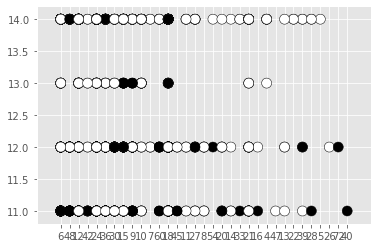

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.datasets.samples_generator import make_blobs
style.use("ggplot")
#print(X_resampled)
X2, y2 = make_blobs(n_samples=40, centers=2, random_state=42, cluster_std=1.25)
#print(X2)
X_resampled['duration'] = X_resampled['duration'].apply(pd.to_numeric) # should be done to all columns if they are to be interpreted numerically
X_resampled2 = X_resampled[['account_status', 'duration']].copy() # not working 

print(X_resampled2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_resampled2, y_resampled2, random_state=1)
X_train2 = sc.fit_transform(X_train2)

X_test2 = sc.transform(X_test2)
print(type(X_resampled2.duration[2]))
x_min = X_resampled2.duration.min() # switched becasue the function was returning opposites
x_max = X_resampled2.duration.max()
y_min = X_resampled2.account_status.min()
y_max = X_resampled2.account_status.max()
model2 = SVC(kernel='linear')
model2.fit(X_train2, y_train2)
print(len(X_train2[0]))
print(y_max,y_min,x_min,x_max)
# issue what is our x and what is our y value from 20 features.  The color is the pass or fail outcome.
# decision function needs all features 
XX, YY = np.mgrid[int(x_min):int(x_max), y_min:y_max]
#Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()]) # only giving two features need to use all 20 features
Z = model2.decision_function(np.c_[XX.ravel(), YY.ravel()])
# Put the result into a color plot
Z = Z.reshape(XX.shape)
# plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.scatter(X.duration, X.account_status, c=y, cmap='bwr', edgecolor='k', s=100)
plt.show()# Plot the decision boundaries


In [24]:
from sklearn.metrics import classification_report

print (classification_report(y_test, predictions,
                            target_names=["bad","good"]))

              precision    recall  f1-score   support

         bad       0.70      0.75      0.72       173
        good       0.73      0.68      0.71       177

    accuracy                           0.71       350
   macro avg       0.72      0.71      0.71       350
weighted avg       0.72      0.71      0.71       350



# GridSearch

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1, 5, 10],
             'gamma': [0.001, 0.01, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [26]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.719, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.724, total=   0.1s
[CV] C=1, gamma=0.001 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] .................... C=1, gamma=0.001, score=0.724, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.781, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.733, total=   0.1s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.719, total=   0.1s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.724, total=   0.1s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.724, total=   0.1s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.781, total=   0.1s
[CV] C=1, gamma=0.01 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   11.3s finished


GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10], 'gamma': [0.001, 0.01, 0.01]},
             verbose=3)

In [27]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'gamma': 0.001}
0.7361904761904762


In [28]:
predictions = grid.predict(X_test)

In [29]:
print (classification_report(y_test, predictions,
                            target_names=["bad","good"]))

              precision    recall  f1-score   support

         bad       0.70      0.75      0.72       173
        good       0.73      0.68      0.71       177

    accuracy                           0.71       350
   macro avg       0.72      0.71      0.71       350
weighted avg       0.72      0.71      0.71       350



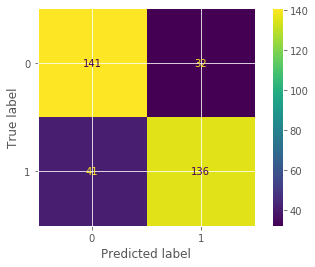

In [30]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
import matplotlib.pyplot as plt

clf = SVC(random_state=1)
clf.fit(X_train, y_train)
SVC(random_state=1)
plot_confusion_matrix(clf, X_test, y_test)
plt.show()